In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [3]:
class_names=['combat','fire','destroyedbuilding','militaryvehicles','humanitarianaid']
c_n_label={class_names:i for i,class_names in enumerate(class_names)}

nb=len(class_names)
print(c_n_label)
I_s=(150,150)

{'combat': 0, 'fire': 1, 'destroyedbuilding': 2, 'militaryvehicles': 3, 'humanitarianaid': 4}


In [6]:
def load_d():
  DI=r"D:\Data_dl"
  Ca=["Train","Test"]
  output=[]
  for cat in Ca:
    path=f'{DI}/{cat}'
    print(path)
    images=[]
    labels=[]
    print("Loading{}",format(cat))
    for fol in os.listdir(path):
      label=c_n_label[fol]
      for fil in os.listdir(os.path.join(path,fol)):
        img_p=os.path.join(os.path.join(path,fol),fil)
        image=cv2.imread(img_p)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,I_s)
        images.append(image)
        labels.append(label)
         
    images=np.array(images,dtype='float32')
    labels=np.array(labels,dtype='int32')
    output.append((images,labels))
  return output

In [ ]:
(T_i,T_l),(t_i,t_l)=load_d()

In [ ]:

T_i,T_l=shuffle(T_i,T_l,random_state=20)


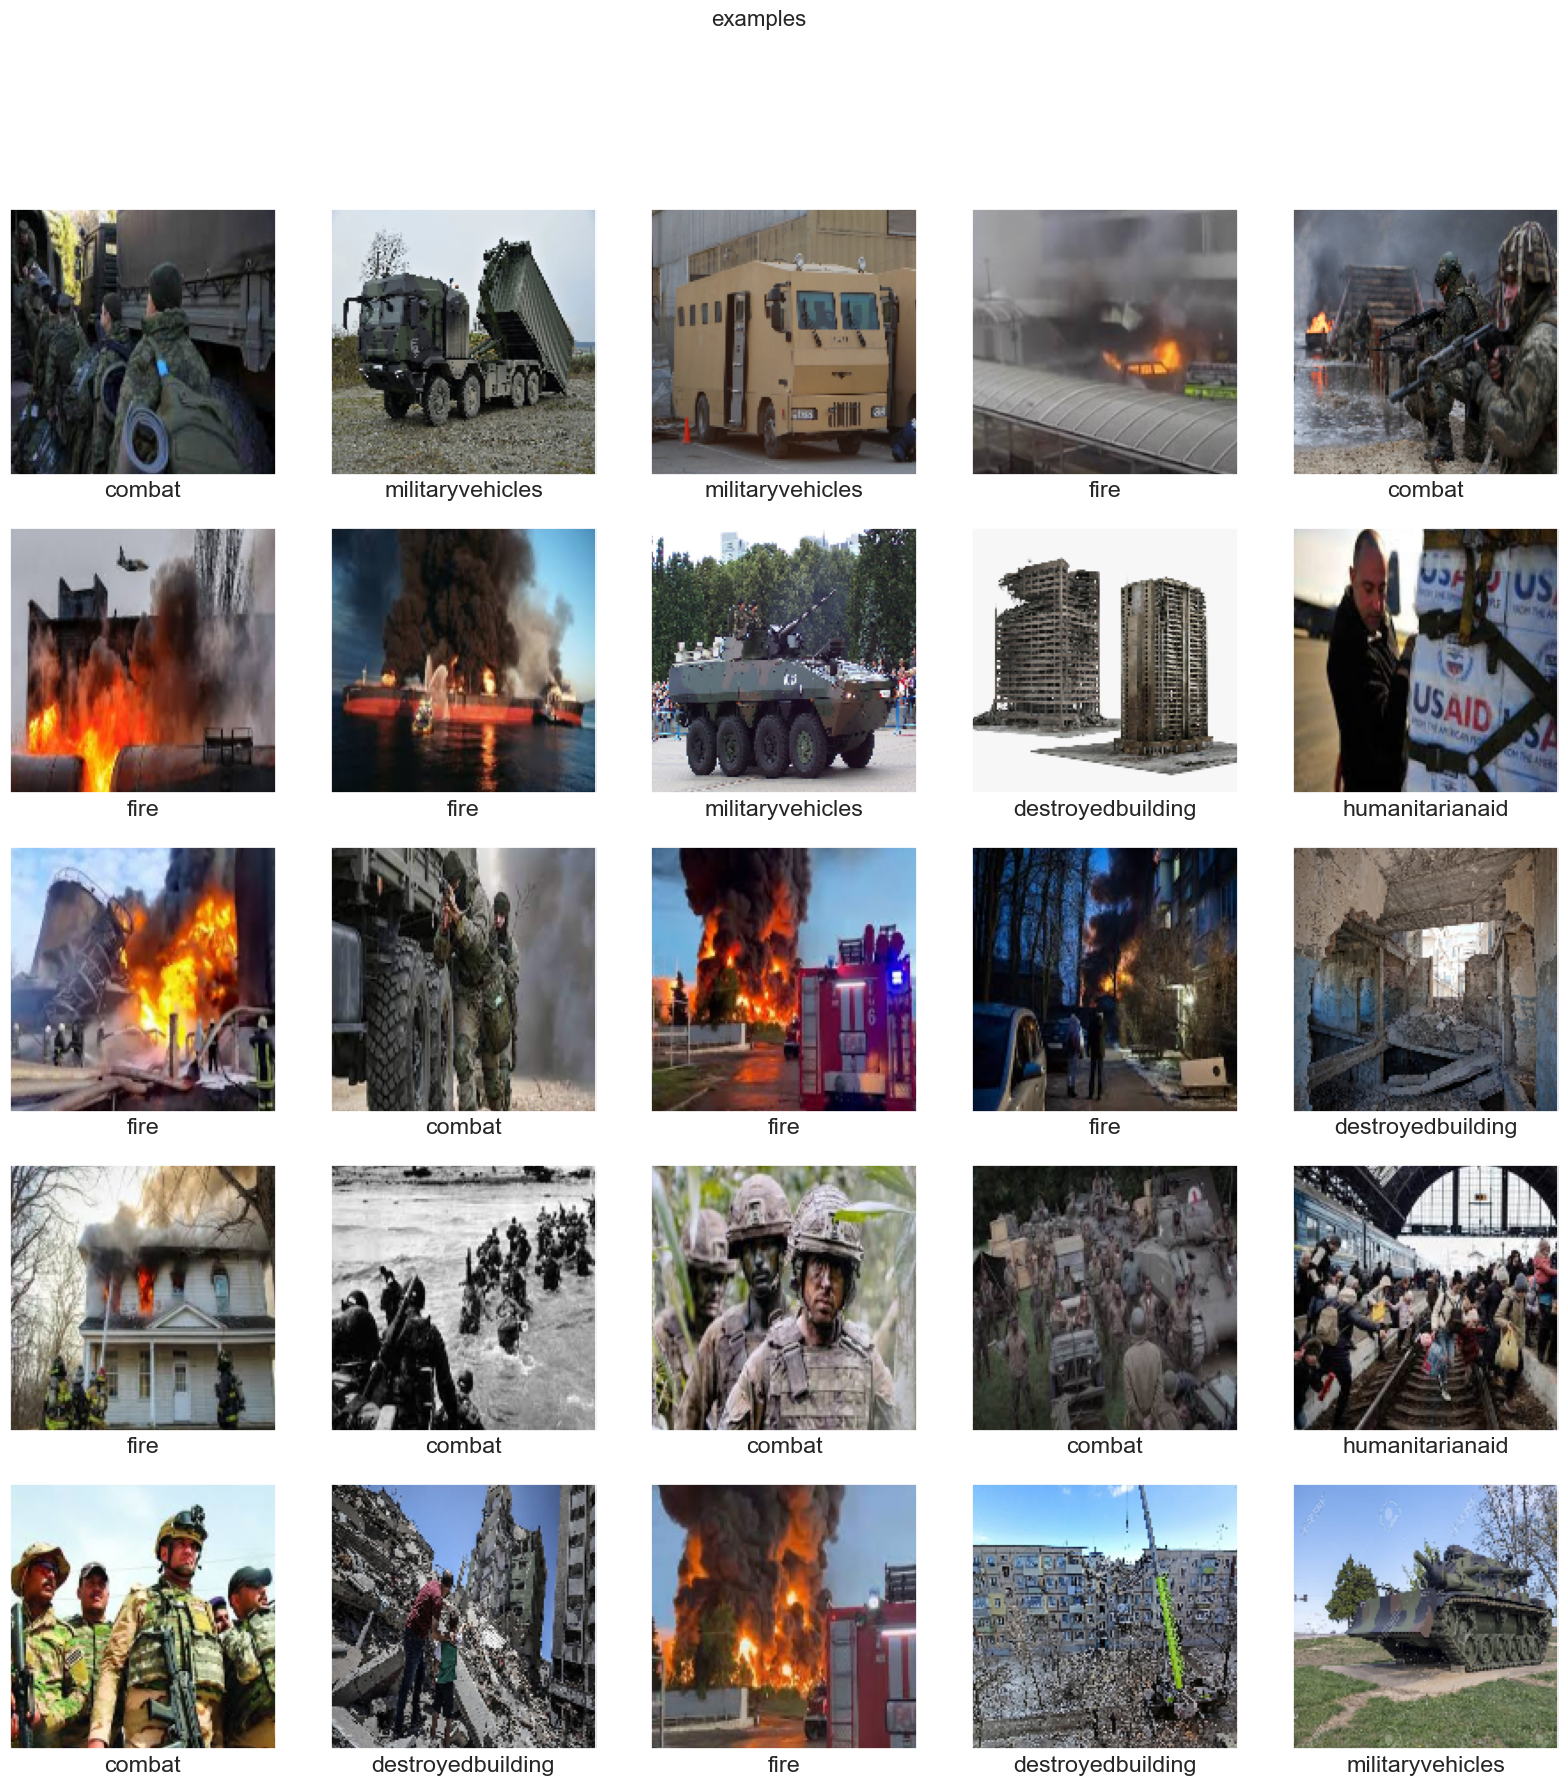

In [ ]:
def dis(class_names,images,labels):
    figsize=(20,20)
    fig=plt.figure(figsize=figsize)
    fig.suptitle("examples",fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()
dis(class_names,T_i,T_l)      


In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),tf.keras.layers.MaxPooling2D(2,2),tf.keras.layers.Conv2D(32,(3,3),activation='relu'),tf.keras.layers.MaxPooling2D(2,2),tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(6,activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
his=model.fit(T_i,T_l,batch_size=128,epochs=7,validation_split=0.2)


Epoch 1/7
3/3 [==============================] - 8s 2s/step - loss: 1612.4574 - accuracy: 0.2219 - val_loss: 2282.3503 - val_accuracy: 0.2125
Epoch 2/7
3/3 [==============================] - 5s 1s/step - loss: 1337.4939 - accuracy: 0.2188 - val_loss: 908.9762 - val_accuracy: 0.1500
Epoch 3/7
3/3 [==============================] - 4s 1s/step - loss: 503.9595 - accuracy: 0.1969 - val_loss: 187.3540 - val_accuracy: 0.2000
Epoch 4/7
3/3 [==============================] - 4s 1s/step - loss: 74.9363 - accuracy: 0.3094 - val_loss: 26.9764 - val_accuracy: 0.1250
Epoch 5/7
3/3 [==============================] - 4s 1s/step - loss: 14.7224 - accuracy: 0.2469 - val_loss: 3.5455 - val_accuracy: 0.2375
Epoch 6/7
3/3 [==============================] - 4s 1s/step - loss: 2.5872 - accuracy: 0.4469 - val_loss: 4.6033 - val_accuracy: 0.3625
Epoch 7/7
3/3 [==============================] - 5s 1s/step - loss: 2.2550 - accuracy: 0.5031 - val_loss: 2.2860 - val_accuracy: 0.3250


In [ ]:
model.save("full.h5")